# Bike Sharing Demand (for kaggle high score)
https://www.kaggle.com/c/bike-sharing-demand

In [19]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
# parse_dates : 'datetime' 컬럼을 python date type 으로 처리하기 위해
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [3]:
# 차트를 jupyter notebook에 출력해서 보기 위한 명령어
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

### Explore datetime

In [4]:
# datatime 을 python date type 으로 load 했기 때문에 '.dt' 속성을 이용해서 년/월/일/시/분/초/요일 등의 정보에 접근 가능함
# datatime 으로 부터 년/월/일/시/분/초 컬럼 추가
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


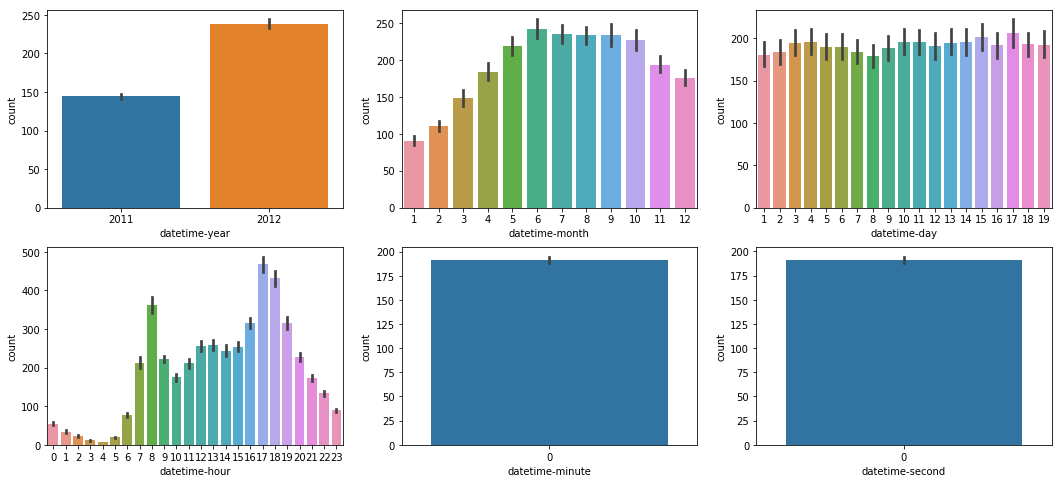

In [5]:
# 2 X 3 subplot 선언
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
# subplot size 선언
figure.set_size_inches(18, 8)
# time 관련 feature 들과 대여 수(count) 관계를 barplot 을 이용해 확인
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday

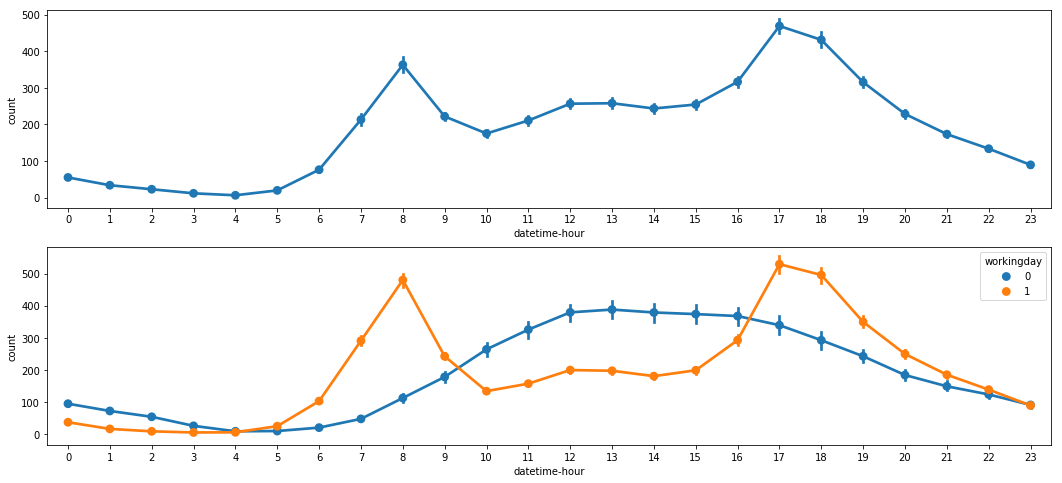

In [6]:
# 2 X 1 subplot 선언
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

# 시간과 대여 수(count)의 관계를 pointplot 을 이용해 확인
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
# hue="workingday" 를 추가해서 주중 시간대와, 주말 시간대별 대여수 관계를 확인
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [7]:
# 요일(dayofweek) 컬럼 추가 (0 = monday, ~ 6 = sunday) 
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


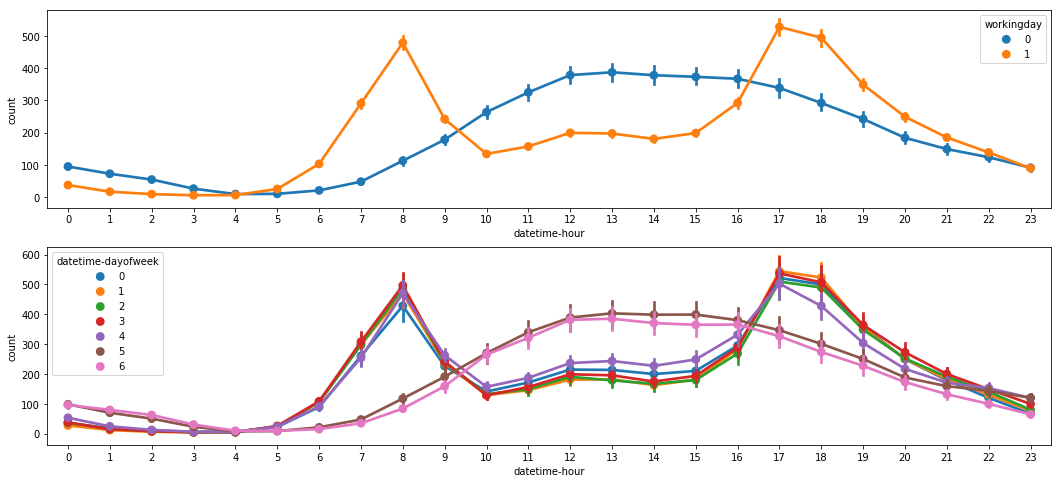

In [8]:
# 2 X 1 subplot 선언
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

# 주중/주말 시간대별 대여수 차이
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
# 요일 시간대별 대여수 차이
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

### Concatenate year and month

In [9]:
# datetime 을 받아서 '년-월' 값을 만들어 주는 함수 정의
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
# 년-월 컬럼 추가 (년-월 별 대여량 차이 확인 하기 위해서)
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


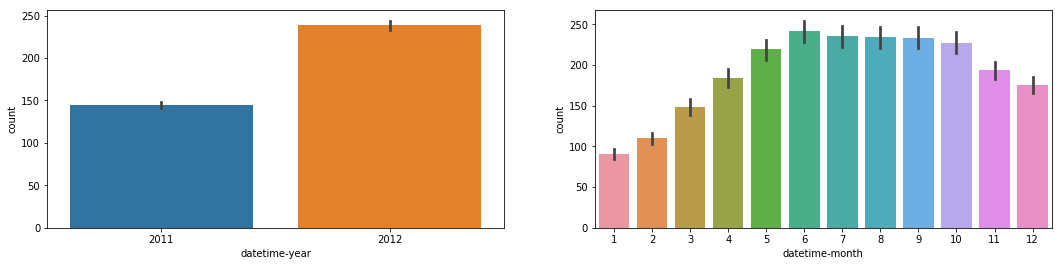

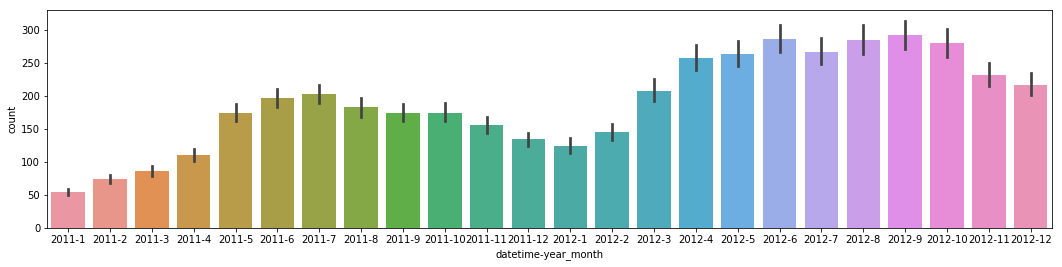

In [10]:
# 1 X 1 subplot 선언
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
# 연도별 대여수 차이 확인
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
# 월별 대여수 차이 확인
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# 하나짜리 subplot 선언 (차트 하나를 원하는 사이즈로 출력하고 싶을 때 사용하는 Tip)
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
# 위에서 새로 추가한 년-월 별 대여수 차이 확인
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

## Reload Dataset

In [11]:
# 전처리 하기위해 train 원본 데이터를 다시 load
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
# test 데이터도 전처리를 같이 해야 하기 때문에 함께 load
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [13]:
# train 데이터에 년/월/일/시간/요일 컬럼 추가
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-dayofweek"]].head()

(10886, 17)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


In [14]:
# test 데이터에 년/월/일/시간/요일 컬럼 추가
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-dayofweek"]].head()

(6493, 14)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,3
1,2011-01-20 01:00:00,2011,1,20,1,3
2,2011-01-20 02:00:00,2011,1,20,2,3
3,2011-01-20 03:00:00,2011,1,20,3,3
4,2011-01-20 04:00:00,2011,1,20,4,3


## Train

In [15]:
# train 시킬 feature 선언
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [16]:
# train 시킬 데이터셋(feature) 준비 : X_train
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [17]:
# 예측(predict) 할 test 데이터셋 준비 : X_test
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [20]:
label_name = "count"
y_train = np.log(train[label_name]+1)

label_casual = "casual"
y_casual = np.log(train[label_casual]+1)

label_registered = "registered"
y_registered = np.log(train[label_registered]+1)

y_train.head(5)

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score

#### a : 정답, P : 측정값

$|P-a|$ = mean absolute error (MAE)


$|P-a|^2$ = mean squared error (MSE)


$ \sqrt{(p-a)^2}$ = root mean squared error (RMSE)


$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $ = root mean squared log error (RMSLE)


- 차이가 크면 클수록 페널티를 주고 싶으면 MSE 를 사용 함

- 차이가 크면 클루록 페널티가 줄어들게 하고 싶으면 RMSLE 사용 함 (RMSLE 로직은 직접 구현해야 함)

In [ ]:
# RMSLE 함수 구현
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

# y_train 값을 log 값으로 치환했기 때문에 두번 log 되지 않도록
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

In [ ]:
# y_casual 에 대한 score 계산
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_casual, cv=20, \
                         scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(-score))

In [ ]:
# y_registered 에 대한 score 계산
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_registered, cv=20, \
                         scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(-score))

## Train

In [ ]:
# casual 만 따로 학습
model.fit(X_train, y_casual)

In [ ]:
# casual train 데이터만 학습한 모델을 가지고 테스트 데이터셋을 예측
# y_casual 이 np.log 를 사용했기 때문에 다시 원래 값으로 복원하기 위해 지수함수 적용
predictions_casual = np.exp(model.predict(X_test)) - 1

In [ ]:
# registered 만 따로 학습
model.fit(X_train, y_registered)

In [ ]:
# registered train 데이터만 학습한 모델을 가지고 테스트 데이터셋을 예측
# y_registered 이 np.log 를 사용했기 때문에 다시 원래 값으로 복원하기 위해 지수함수 적용
predictions_registered = np.exp(model.predict(X_test)) - 1

In [ ]:
# 전체 대여수는 casual + registered 이기 때문에 각각 학습한 모델로 예측한 값을 더해 줌
predictions = predictions_casual + predictions_registered

print(predictions.shape)
predictions

#### Calculate feature importances

In [ ]:
importances = model.feature_importances_
importance_by_feature = list(zip(feature_names, importances))
importance_by_feature

In [ ]:
# subplots 를 이용해서 차트 하나의 가로/세로 사이즈를 조정하고 싶을 경우 응용
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

importance_df = pd.DataFrame(importance_by_feature, columns=['feature', 'importance'])
sns.barplot(data=importance_df, x='feature', y='importance', ax=ax1)

## Submit

In [ ]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

In [ ]:
# 저장할 파일을 구분하기 위해 파일명에 timestamp 정보 추가 하기 위한 작업 
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "bike-random-forest"

filename = "{date}_{desc}_{score}.csv".format(date=current_date, desc=description, score="{0:.5f}".format(score))
filepath = "data/{filename}".format(filename=filename)

submission.to_csv(filepath, index=False)